# Prediction using Unsupervised ML

#### TASK-2

#### Domian Data Science and Business Analytics
#### offered by : The sparks foundation
 

Done by : L.Maruthi sai

### Ojective : 

From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually. 


## Importing necessary python libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sea

## Data preparation


In [2]:
raw_data=pd.read_csv('M:\\GRIP TSF\\Iris.csv')

In [3]:
raw_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
raw_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
raw_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Cleaning 

In [7]:
raw_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data=raw_data.copy()

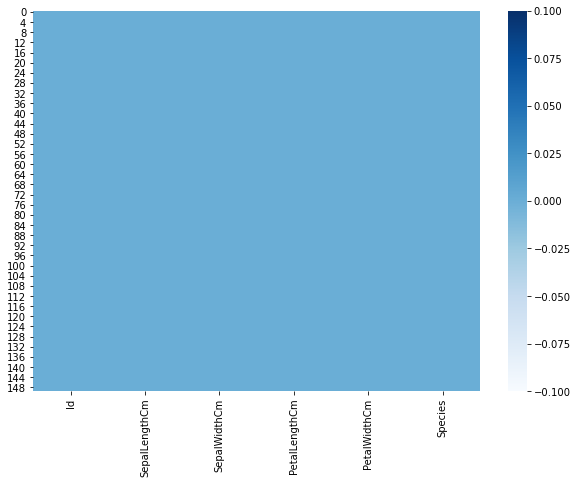

In [9]:
mat.subplots(figsize=(10,7))
sea.heatmap(data.isnull(), cmap='Blues')

## Data Visualization 

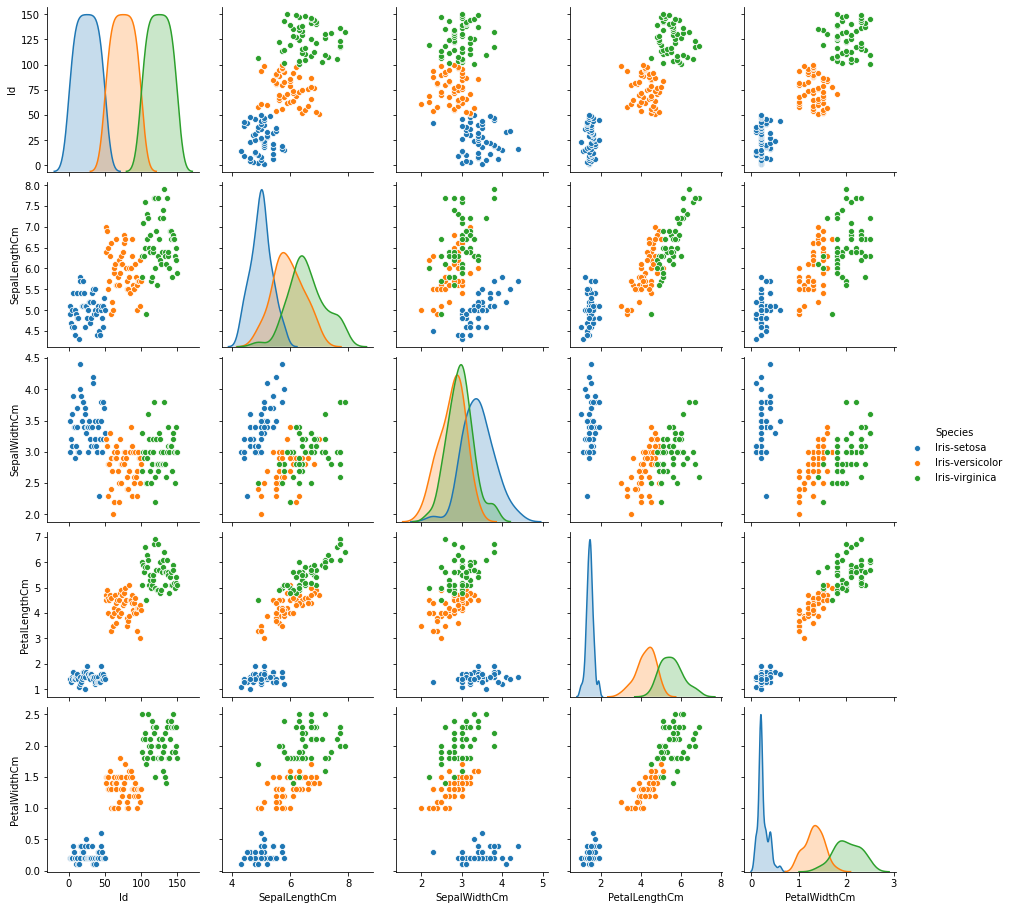

In [36]:
sea.pairplot(data,hue='Species')

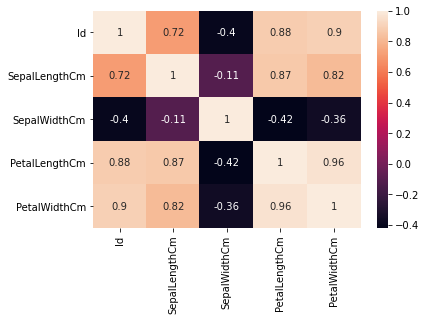

In [11]:
sea.heatmap(data.corr(),annot=True)

## Unsuperwised Machine Learning model 

### Model building 

In [12]:
# defining the dependent and independent featuers in the data set
X=data.drop(['Id','Species'],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
from sklearn.cluster import KMeans
# but we dont know the optimal clusters that can be made in the data set

### Model Optimization


In [14]:
# to find the best cluster suited for the data 
WCSS=[]
for a in range(1,15):
    km=KMeans(a)
    km.fit_predict(X)
    WCSS.append(km.inertia_)

Text(0.5, 1.0, 'Optimizing the number of clusters')

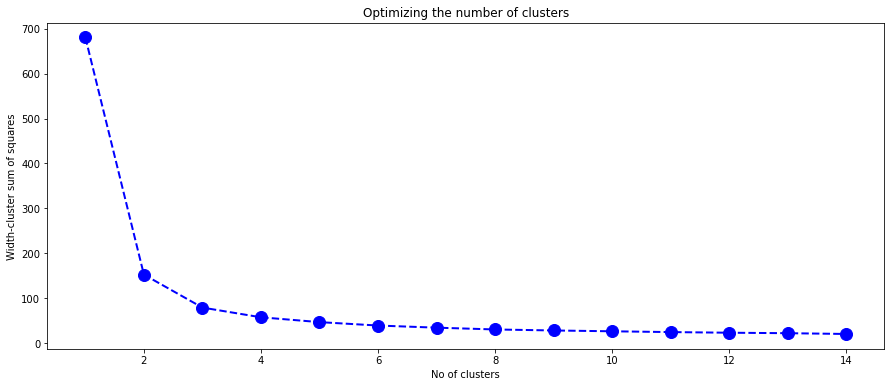

In [15]:
mat.subplots(figsize=(15,6))
mat.plot(np.arange(1,15,1),WCSS, 'bo--', linewidth=2, markersize=12)
mat.xlabel('No of clusters')
mat.ylabel('Width-cluster sum of squares')
mat.title('Optimizing the number of clusters')

from the graph we can see that WCSS is not decreasing further from no of cluster  [ 3 ] hence the optimal number of clusters for the data is 3

###  Model evaluation

In [16]:
obj=KMeans(3,init='k-means++',max_iter = 200, n_init = 8, random_state = 0)
pred=obj.fit_predict(X)

In [17]:
new_data=pd.DataFrame(X)

In [18]:
obj.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [19]:
new_data['cluster']   =   pred

In [20]:
new_data['cluster'].value_counts()

2    62
1    50
0    38
Name: cluster, dtype: int64

### Model visualization 

In [21]:
df1=new_data[new_data['cluster']==0]
df2=new_data[new_data['cluster']==1]
df3=new_data[new_data['cluster']==2]
raw_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 1 . Sepal Length Vs Sepal Width 

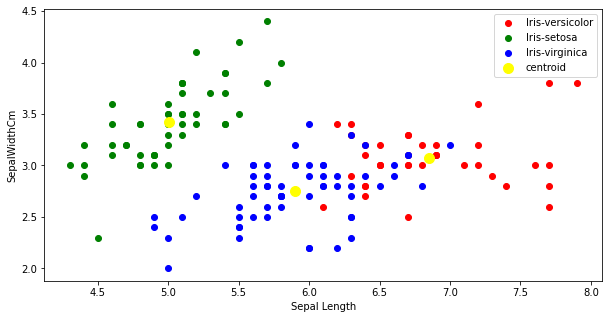

In [22]:
mat.subplots(figsize=(10,5))
mat.scatter(df1.SepalLengthCm,df1.SepalWidthCm, c='Red',label='Iris-versicolor')
mat.scatter(df2.SepalLengthCm,df2.SepalWidthCm, c='Green',label='Iris-setosa')
mat.scatter(df3.SepalLengthCm,df3.SepalWidthCm, c='Blue',label='Iris-virginica')
mat.scatter(obj.cluster_centers_[:,0],obj.cluster_centers_[:,1],s=100,color='yellow',label='centroid')
mat.ylabel('SepalWidthCm')
mat.xlabel('Sepal Length')
mat.legend()

### 2 . Petal Length Vs Petal Width 

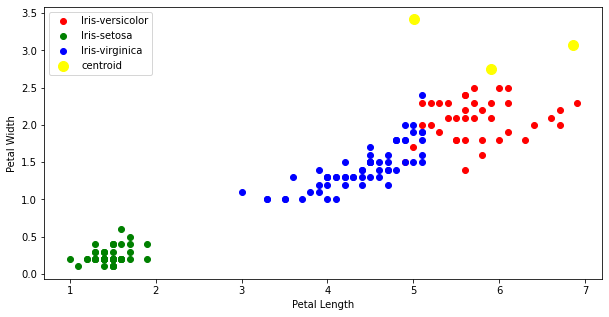

In [23]:
mat.subplots(figsize=(10,5))
mat.scatter(df1.PetalLengthCm,df1.PetalWidthCm, c='Red',label='Iris-versicolor')
mat.scatter(df2.PetalLengthCm,df2.PetalWidthCm, c='Green',label='Iris-setosa')
mat.scatter(df3.PetalLengthCm,df3.PetalWidthCm, c='Blue',label='Iris-virginica')
mat.scatter(obj.cluster_centers_[:,0],obj.cluster_centers_[:,1],s=100,color='yellow',label='centroid')
mat.ylabel('Petal Width')
mat.xlabel('Petal Length')
mat.legend()

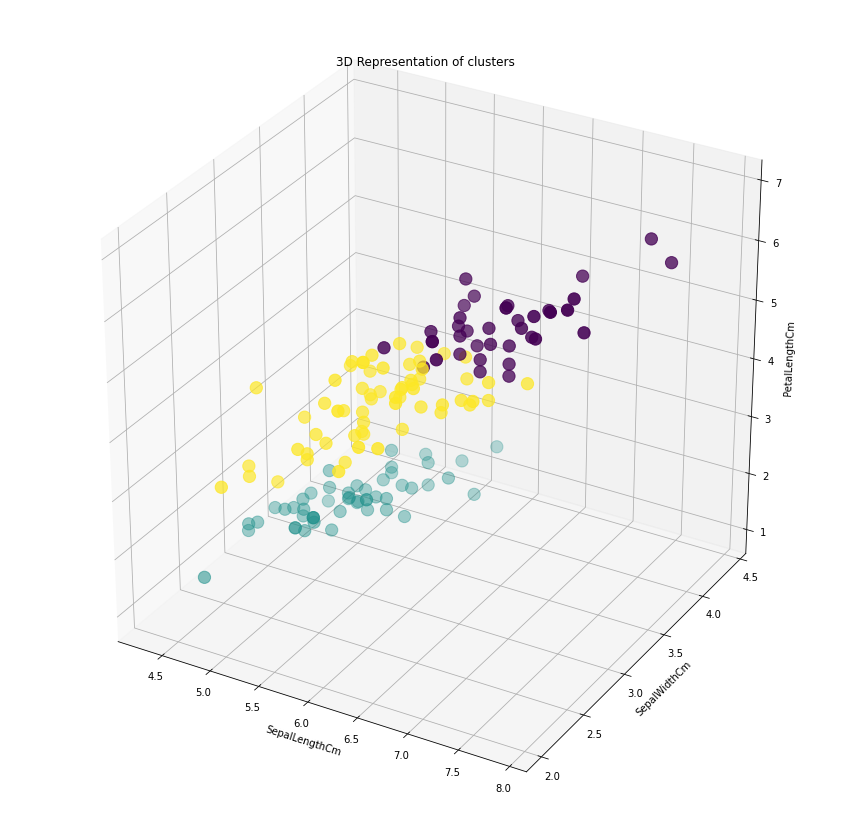

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = mat.figure(figsize=(15,15))
axis = fig.add_subplot(111, projection='3d')
x = np.array(new_data["SepalLengthCm"])
y = np.array(new_data["SepalWidthCm"])
z = np.array(new_data["PetalLengthCm"])
axis.scatter(x,y,z, c=new_data["cluster"], s=150)
axis.set_zlabel('PetalLengthCm')
mat.xlabel("SepalLengthCm")
mat.ylabel('SepalWidthCm')
mat.title('3D Representation of clusters')
mat.show()

### Conclusion 

The optimum number of cluster that can be formed for the given data set is [ 3 ]